<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/Minha_primeira_rede_neural/blob/main/C%C3%B3pia_de_Minha_primeira_rn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Instale tensor flow e keras

!pip install tensorflow
!pip install keras

In [ ]:
import keras
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/admission_dataset.csv')
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          315          105                  3  2.0  2.5  8.48         0   
1          321          112                  5  5.0  5.0  9.06         1   
2          327          103                  3  4.0  4.0  8.30         1   
3          305          112                  3  3.0  3.5  8.65         0   
4          297           96                  2  2.5  1.5  7.89         0   
..         ...          ...                ...  ...  ...   ...       ...   
395        320          111                  4  4.5  3.5  8.87         1   
396        305          103                  2  2.5  3.5  8.13         0   
397        305          107                  2  2.5  2.5  8.42         0   
398        320          104                  3  3.0  2.5  8.57         1   
399        331          120                  3  4.0  4.0  8.96         1   

     Chance of Admit  
0               0.75  
1               0.86  
2               0.

In [ ]:
X= df.drop('Chance of Admit', axis =1)
y = df['Chance of Admit']

O dataset calcula a probabilidade de ser admitido em uma faculdade "Chance of admit"

In [ ]:
x_treino, x_teste =X[0:300], X[300:]
y_treino, y_teste =y[0:300], y[300:]

In [ ]:
x_treino.shape

(300, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Criando arquitetura da rede neural

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=3, activation ="relu", input_dim=7))
modelo.add(Dense(units=1, activation ="linear"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Treine essa rede neural

# Compilando o modelo
modelo.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Treinando o modelo, incluindo validation_split para gerar val_loss
resultado=modelo.fit(x_treino, y_treino, epochs=200, batch_size=32, validation_split=0.2) # adicionando validation_split

# Avaliando o modelo
loss, mae = modelo.evaluate(x_teste, y_teste)
print('Loss:', loss)
print('MAE:', mae)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.2268 - mae: 0.9024 - val_loss: 1.2118 - val_mae: 0.8402
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0940 - mae: 0.8261 - val_loss: 1.1241 - val_mae: 0.8351
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0121 - mae: 0.8027 - val_loss: 1.2143 - val_mae: 0.8393
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1495 - mae: 0.8594 - val_loss: 1.1208 - val_mae: 0.8402
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9857 - mae: 0.7721 - val_loss: 1.1455 - val_mae: 0.8568
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0355 - mae: 0.8318 - val_loss: 1.1069 - val_mae: 0.8239
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0852 - mae: 0.8335 - val_loss: 1.3483 - val_mae: 0.8825
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1330 - mae: 0.8384 - val_loss: 1.1064 - val_mae: 0.8377
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0142 - mae: 0.7880 -

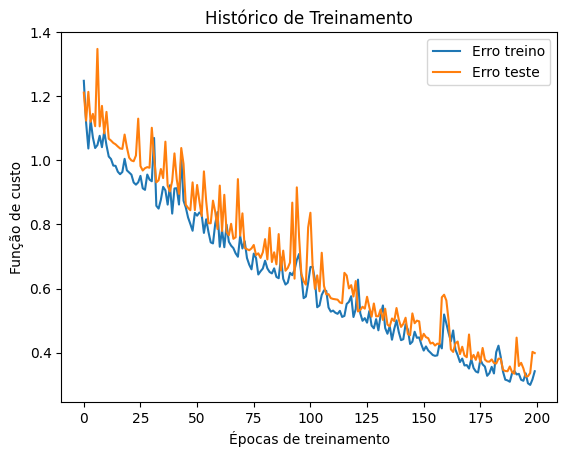

In [ ]:
#Plotando gráfico do histórico de treinamento

import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()